In [10]:
import sys
import pandas
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
from numpy import diff
import os
warnings.filterwarnings('ignore')
cmap = plt.get_cmap('twilight')
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','steelblue','slateblue']
datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Relaxation/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Relaxation/Plots/'

sys.setrecursionlimit(10000) 

In [40]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x , diff[x]

Text(0, 0.5, '$\\langle cos^{2}(\\theta)\\rangle$')

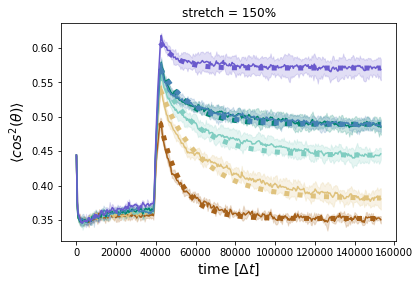

In [61]:
fig,ax = plt.subplots()
frame = 440
ChemEngs = "3.0 4.0 5.0 6.0 7.0 100.0".split()
for e in range(len(ChemEngs)):
    file = 'alignmentrelax_E'+str(ChemEngs[e])+'.dat'
    almnt = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')
    time = almnt.Time
    AvMSq_ = almnt.AvMSq
    AvMSq = AvMSq_.values
    AvMSqStd = almnt.AvMSqStd
    t_postStretch = 96
    LastTs = 20 
    phi_inf = np.mean(AvMSq[-LastTs:])
    phi0 = AvMSq[t_postStretch]-phi_inf
    phiTau = phi0/np.exp(1) + phi_inf
    AvMSqD =AvMSq[t_postStretch:]
    tau = intersection(AvMSqD,phiTau)[0]
    phiTheory = []
    for tt in range(len(time[t_postStretch:])):
        t = time[tt]
        phiTheory.append(phiform(phi0,phi_inf,tau,t))
    if e==2:
        AvMsqSave = AvMSq
        AvMsqStdSave = AvMSqStd
        phiThSave, tauSave, phiinfSave,phi0Save = phiTheory,tau,phi_inf,phi0
    ax.plot(np.multiply(time,frame),AvMSq,color = clrs[e])
    ax.fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = clrs[e])
    ax.plot(np.multiply(time[t_postStretch:],frame),phiTheory,color = clrs[e],linestyle = ':',linewidth = 5)

ax.set_title("Stretch = 150%")
ax.set_xlabel(r"time [$\Delta t$]",fontsize =fs)
ax.set_ylabel(r'$\langle cos^{2}(\theta)\rangle$',fontsize =fs)

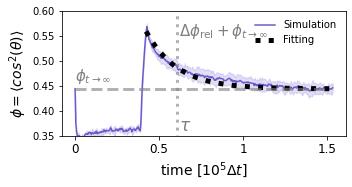

In [59]:
## One example ##
fig,ax = plt.subplots(figsize = (5,2.7))
fs = 14

ax.plot(np.multiply(time,frame),AvMsqSave,alpha = 1,color = clrs[e],label = "Simulation")
ax.fill_between(np.multiply(time,frame),np.add(AvMsqSave,AvMsqStdSave),np.add(AvMsqSave,-AvMsqStdSave),alpha = 0.2,color = clrs[e])
ax.plot(np.multiply(time[t_postStretch:],frame),phiThSave,color = 'black',linestyle = ':',linewidth = 5,label = "Fitting")
ax.plot([tauSave*frame+time[t_postStretch]*frame,tauSave*frame+time[t_postStretch]*frame],[0.33,0.6],linestyle = ':',linewidth = 3,alpha = 0.6,color = 'gray') #'tab:blue'
#ax[x].plot(np.multiply(time[t_postStretch:],frame),phiTheory,color = clrs[e],linestyle = ':',linewidth = 5)
#ax.plot([np.multiply(tau+time[t_postStretch],frame),np.multiply(tau+time[t_postStretch],frame)],[0.3,0.6],color = clrs[e])
ax.plot([0,150000],[phiinfSave, phiinfSave],linestyle = '--',linewidth = 3,alpha = 0.6,color = 'gray')
ax.plot([0,150000],[phi0Save,phi0Save],linestyle = '--',linewidth = 3,alpha = 0.6,color = 'gray') #tab:brown
#ax.plot([0,150],[phi0+phi_inf,phi0+phi_inf],linestyle = '--',color = cmap(0.5/2))
text1 = r"$\tau$"
text2 = r"$\Delta\phi_{\mathrm{rel}}+\phi_{t\rightarrow\infty}$"
text3 = r"$\phi_{t\rightarrow\infty}$"
ax.text(62000,0.36,text1,fontsize = 17,color = 'gray')
ax.text(0,0.46,text3,fontsize = 15,color = 'gray')
ax.text(62000,0.55,text2,fontsize = 15,color = 'gray')
#ax.set_title("stretch = "+xStretchesL[x]+"%")
ax.set_xlabel(r"time [$10^5\Delta t$]",fontsize =fs)
ax.set_ylabel(r'$\phi = \langle cos^{2}(\theta)\rangle$',fontsize =fs)
ax.set_xticks([0,50000,100000,150000],['0','0.5','1','1.5'],fontsize = 12)
#ax.set_title(r'$\phi = \Delta\phi_{\mathrm{rel}}e^{-t/\tau} + \phi_{t\rightarrow\infty}$',fontsize = 16)
ax.set_ylim([0.35,0.6])
ax.legend(frameon=False)
fig.tight_layout()
fig.savefig(plotsdir +"Phi_Example_long.pdf")